## Bottom-up Dynamic Programming Approach

$f_{i}(\omega)$ is the maximum value that can be accumulated using first $i$ items, subject to weight $\omega$ , $\omega_{i+1}$ is the weight of the $i+1$ item \
So the recursion would be: \
$ f_{i+1}(\omega) = \max \left \{f_{i}(\omega), f_{i+1}(\omega-\omega_{i+1}) \right \} $

In [45]:
def Bottom_up_dynamic_programming(profits,weights,W):
    #一共有n个物品，背包容量为W
    n = len(weights)
    #生成一个n+1 x W的二维数组，f[i][j]表示前i个物品放入容量为j的背包中的最大价值
    f = [[0 for i in range(W+1)] for j in range(n+1)]
    #遍历1到n+1共n个物品
    for i in range(1,n+1):
        #遍历从1到W个容量
        for j in range(1,W+1):
            #如果正在遍历的物品重量大于当前背包容量，则无法放入背包
            if weights[i-1] > j:
                f[i][j] = f[i-1][j]
            #如果可以放入背包，比较和放入和不放入的价值
            else:
                f[i][j] = max(f[i-1][j],f[i-1][j-weights[i-1]]+profits[i-1])
    return f[n][W]
# Time complexity would be N*W, where N is the number of items and W is the capacity of the knapsack, it's pesudo-polynominal.

In [42]:
#另一种实现方式
def Bottom_up_dynamic_programming(profits,weights,W):
    n = len(weights)
    f = [0 for i in range(W+1)]
    for i in range(1,n+1):
        #为了防止上一层遍历的结果被覆盖，需要从后往前遍历
        for j in range(W,0,-1):
            if weights[i-1] <= j:
                f[j] = max(f[j],f[j-weights[i-1]]+profits[i-1])
    return f[W]
# Time complexity would be N*W, where N is the number of items and W is the capacity of the knapsack, it's pesudo-polynominal.

In [46]:
def test_dynamic_programming(approach):
    capacity = 50
    weights = [3, 7, 2, 5, 9, 4, 8, 6, 1, 3, 6, 7, 4, 2, 5, 8, 9, 2, 3, 7, 4, 5, 1, 6, 3]
    profits = [4, 8, 3, 6, 10, 7, 9, 5, 2, 1, 8, 3, 6, 5, 7, 6, 4, 5, 8, 2, 6, 7, 3, 4, 2]
    result = approach(profits,weights,capacity)
    print('Optimal profit:',result)

    return result
test_dynamic_programming(Bottom_up_dynamic_programming)

Optimal profit: 80


80

## Genetic Algorithm Approach

In [6]:
import random
import matplotlib.pyplot as plt

### Poblem Description

In [41]:
""" 
Define item class, an item has a name, weight and profit.
"""
class item():
    def __init__(self,name,weight,profit):
        self.name = name
        self.profit = profit
        self.weight = weight
'''
Initialize the problem
'''
names = ["Item 1", "Item 2", "Item 3", "Item 4", "Item 5", "Item 6", "Item 7", "Item 8", "Item 9", "Item 10", 
    "Item 11", "Item 12", "Item 13", "Item 14", "Item 15", "Item 16", "Item 17", "Item 18", "Item 19", "Item 20", 
    "Item 21", "Item 22", "Item 23", "Item 24", "Item 25"
]
weights = [3, 7, 2, 5, 9, 4, 8, 6, 1, 3, 6, 7, 4, 2, 5, 8, 9, 2, 3, 7, 4, 5, 1, 6, 3]
profits = [4, 8, 3, 6, 10, 7, 9, 5, 2, 1, 8, 3, 6, 5, 7, 6, 4, 5, 8, 2, 6, 7, 3, 4, 2]
items = [item(name, weight, profit) for name, weight, profit in zip(names, weights, profits)]

In [24]:
""" Test Function """
def test_genetic_algorithm(items):
    assert Genetic_algorithm(items) == test_dynamic_programming(Bottom_up_dynamic_programming)
    print('Test passed')

""" Our goal """
def Genetic_algorithm() -> tuple[list, float]:
    # To be implemented
    # Should return the final profits and which items to take
    return Strategy,profits

### Genetic Algorithm implementation

In [47]:
def Genetic_algorithm(items, W, population_size, selection_rate, crossover_rate, mutation_rate, generations):
    """
    Define Individual class 
    """
    class Individual():
        def __init__(self,genes: list):
            self.genes = genes
        #Fitntess function
        def fitness(self):
            total_weight = 0
            total_profit = 0
            total_weight += sum([gene*item.weight for gene,item in zip(self.genes,items)])
            total_profit += sum([gene*item.profit for gene,item in zip(self.genes,items)])
        #total_weight should be less than W, otherwise remove the item with the lowest profit to weight ratio till total_weight <= W
            sorted_items = sorted(enumerate(items),key=lambda x:x[1].profit/x[1].weight)
            i = 0
            while total_weight > W:
                num = sorted_items[i][0]
                if self.genes[num] == 1:
                    self.genes[num] = 0
                    total_weight -= sorted_items[i][1].weight
                    total_profit -= sorted_items[i][1].profit
                i += 1   
            return total_profit       
            """  
           Below is another approach:
           while total_weight > W:
                for i in range(len(genes)-1):
                    if genes[i] == 1:
                        min_profit_density = 1e9
                        current_profit_density = items[i].profit/items[i].weight
                        if current_profit_density < min_profit_density:
                            min_profit_density = current_profit_density
                            genes[i] = 0
                            total_weight -= items[i].weight
                            total_profit -= items[i].profit 
            return total_profit
            """

    """ 
    Initialize population 
    """
    
    def generate_initial_population(population_size) -> list:
        #use datatype set to avoid identical individuals
        population = set()

        # generate initial population having `count` individuals
        while len(population) != population_size:
            # pick random bits one for each item and 
            # create an individual 
            genes = random.choices([0,1],k=len(items))
            I = Individual(genes)
            I.fitness()
            population.add(I)

        return list(population)

    """ Selection """
    def selection(population: list) -> list:
        #Chose part of the population to be candidate parents
        '''chosen_rate = radom.uniform(0.4,0.6)
        chosen_population = random.sample(population,round(chosen_rate*len(population)))'''
        #Select two parents from candidates
        select_probs = [ i.fitness()/sum([i.fitness() for i in population]) for i in population]
        parents = random.choices(population,weights=select_probs,k=2)
        return parents

    """ Crossover """
    def crossover(parents: list) -> list:
        crossover_point = random.randint(1,len(items)-1)
        #create two children with all genes set to 0
        child1,child2 = Individual([0]*len(items)),Individual([0]*len(items))
        child1.genes = parents[0].genes[:crossover_point] + parents[1].genes[crossover_point:]
        child2.genes = parents[1].genes[:crossover_point] + parents[0].genes[crossover_point:]
        childs = [child1,child2]
        return childs

    """ Mutation """
    def mutation(population: list) -> list:
        Individual = random.choice(population)
        mutation_point = random.randint(0,len(items)-1)
        Individual.genes[mutation_point] = 1 - Individual.genes[mutation_point]
        return population

    """ Reproduction(复制) """
    #Select the best individuals to be directly in the next generation
    def reproduction(population: list,reproduction_size) -> list:
        population = sorted(population,key=lambda x:x.fitness(),reverse=True)
        reproducted_population = population[:reproduction_size]
        return reproducted_population

    """ next_generation """
    def next_generation(population: list) -> list:
        next_gen = []#list of next generation
        #Only choose even number of children, because crossoverfunction return 2 children each time.
        children_size = int(selection_rate*population_size)
        if children_size % 2 == 1:
            children_size += 1
        reproduction_size = population_size - children_size
        #Select population*selection_rate candidate parents.
        candidate_parents = random.choices(population,k=children_size)

        children = []#list of children
        #Next generation that are generated by crossover and mutation
        while len(children) != children_size:
            parents = selection(candidate_parents)
            if random.random() < crossover_rate:    #crossover
                childs = crossover(parents)
                if random.random() < mutation_rate:# or mutation
                    childs = mutation(childs)
                children.extend(childs)
        #Next generation that are generated by reproduction
        reproducted = reproduction(population, reproduction_size)#list of reproducted individuals

        next_gen = children + reproducted
        #In case that the next generation contains individuals that violate the weight constraint
        for i in next_gen:
            i.fitness()
        return next_gen

    def plot_fitness(results: list):
        plt.plot(results)
        plt.xlabel('Generations')
        plt.ylabel('Fitness')
        plt.show()

    def print_strategy(Individual):
        result = []
        for i in range(len(items)):
            if Individual.genes[i] == 1:
                result.append(items[i].name)
        profit = Individual.fitness()
        print("Strategy:",','.join(map(str, result)))
        print("Total profit:",profit)
        return result

    """ Algorithm Excution """
    def solver():
        population = generate_initial_population(population_size)
        results = []
        Indi = Individual([0]*len(items))
        for i in range(generations):
            population = next_generation(population)
            I = max(population,key=lambda x: x.fitness())
            profit = I.fitness()

        #To avoid staying in local optimal for too long, the individual mutate every 10 generations.
            if len(results) % 10 == 0:
                mutation_point = random.randint(0,len(items)-1)
                I.genes[mutation_point] = 1
                I.fitness()
            Indi = I
            results.append(profit)
        plot_fitness(results)
        Strategy = print_strategy(Indi)
        
        return Strategy,profit

    Strategy,profit = solver()

    return Strategy, profit

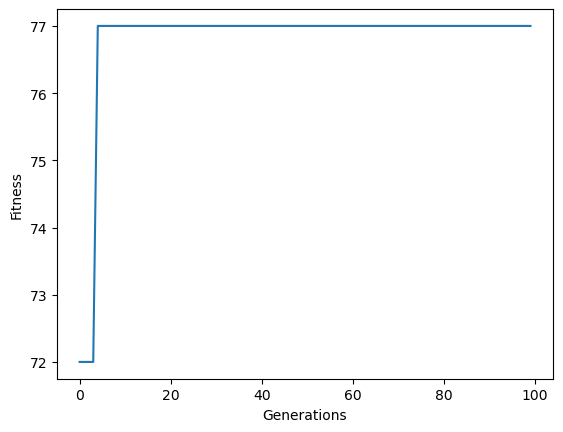

Strategy: Item 1,Item 2,Item 3,Item 4,Item 6,Item 7,Item 13,Item 14,Item 18,Item 19,Item 21,Item 22,Item 23
Total profit: 77


In [48]:
Strategy,profit = Genetic_algorithm(items, 50, 30, 0.9, 0.7, 0.001, 100)